**RQ1: How much does the inflation rate influence the size and performance of the model?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 50, #will be 200 for final version
    'n_iter': 300,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': [0.1, 0.3, 0.5, 0.7, 0.9],
    'reconstruct': True,
    'copy_parent': True

}


In [26]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *

settings_dict = {'': 'name', 'inflate': 'config.p_inflate', 'ms': 'config.ms_upper'}
ana = Analysis('inflationrate', settings_dict) #tq1newdata

Visualization for the Median Test Error (RMSE) of the Final Individual for different Inflation Rates

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

0.1 SLIM*SIG1
                   0.1       0.3       0.5       0.9
dataset_name                                        
auction       0.309524  0.295775  0.293453  0.288606
autism        0.369135  0.349251  0.341391  0.337492
biomed        0.355042  0.358654  0.367886  0.365389
credit        0.397580  0.400749  0.402917  0.404640
darwin        0.460320  0.460695  0.481309  0.461003
heart         0.422364  0.424302  0.433601  0.431520
pc4           0.306855  0.292398  0.289888  0.286801
thyroid       0.371320  0.333516  0.327211  0.329500
wilt          0.114112  0.098464  0.089609  0.084151
wisconsin     0.288718  0.270678  0.268508  0.276310
0.5 SLIM*SIG1
                   0.1       0.3       0.5       0.9
dataset_name                                        
auction       0.303545  0.296455  0.289036  0.292412
autism        0.350639  0.335749  0.307048  0.327743
biomed        0.356046  0.373137  0.373225  0.381613
credit        0.398982  0.401331  0.406018  0.408634
darwin        0.47

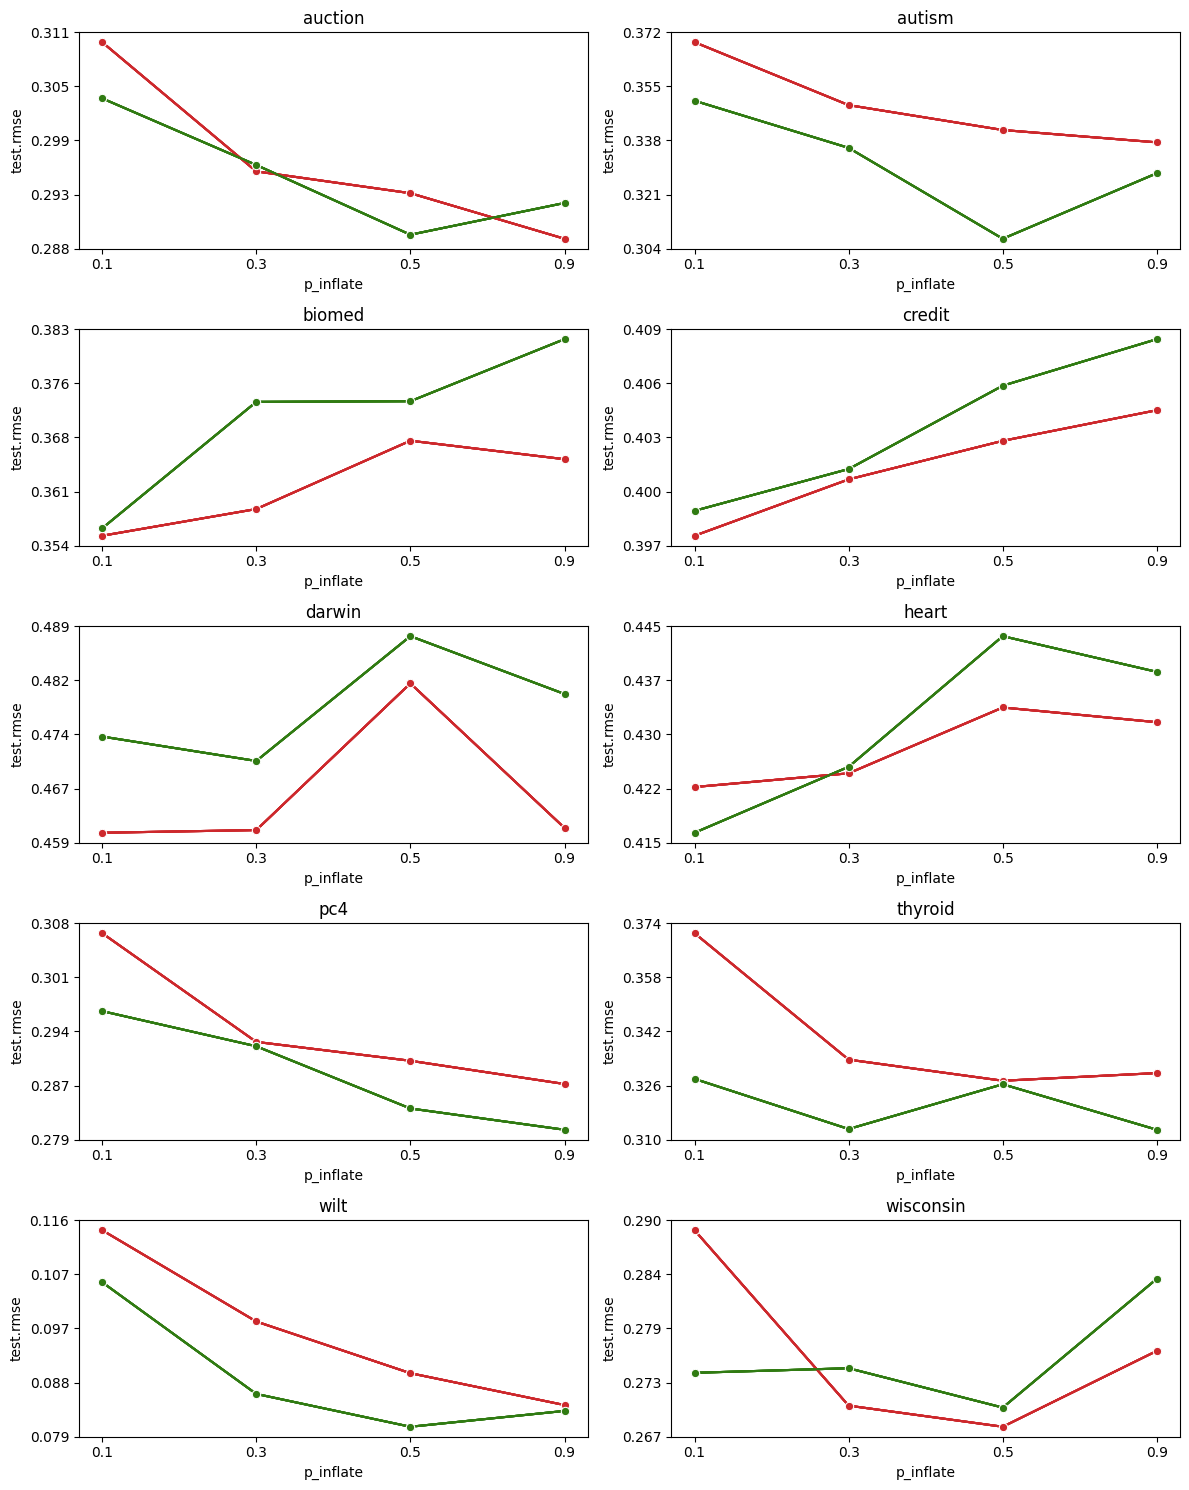

In [27]:
plot_by_p_inflate2(ana.results, 'test.rmse') #[ana.results['config.ms_upper'] == 5]

In [28]:
ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,0.309524,0.303545,0.295928,0.296674,0.295775,0.296455,0.298146,0.289592,0.293453,0.289036,...,0.286976,0.290465,0.284714,0.280396,0.278627,0.288376,0.279663,0.273980,0.279750,2.953698e-01
autism,0.369135,0.350639,0.330682,0.338213,0.349251,0.335749,0.292048,0.256315,0.341391,0.307048,...,0.030079,0.011332,0.122639,0.010643,0.002202,0.000251,0.084704,0.001259,0.000035,1.048136e-07
biomed,0.355042,0.356046,0.344969,0.364250,0.358654,0.373137,0.362122,0.353560,0.367886,0.373225,...,0.314405,0.306111,0.314906,0.324464,0.324757,0.318087,0.323105,0.330701,0.333569,3.417688e-01
credit,0.397580,0.398982,0.398502,0.398467,0.400749,0.401331,0.404540,0.405719,0.402917,0.406018,...,0.403330,0.400746,0.401095,0.407466,0.406278,0.405540,0.405300,0.409622,0.410699,4.100531e-01
darwin,0.460320,0.473838,0.464452,0.489790,0.460695,0.470407,0.478001,0.517376,0.481309,0.487945,...,0.380193,0.416068,0.347013,0.359277,0.368397,0.436497,0.327393,0.366392,0.390210,4.244978e-01
heart,0.422364,0.415905,0.415529,0.411476,0.424302,0.425220,0.399194,0.391185,0.433601,0.443677,...,0.381074,0.385683,0.372534,0.393374,0.399481,0.420317,0.380618,0.416357,0.429815,4.315052e-01
pc4,0.306855,0.296490,0.291786,0.304425,0.292398,0.291817,0.286586,0.295936,0.289888,0.283546,...,0.277858,0.282175,0.276058,0.282900,0.276306,0.277641,0.277119,0.289246,0.284284,2.888072e-01
thyroid,0.371320,0.327773,0.315840,0.290628,0.333516,0.312777,0.320426,0.319974,0.327211,0.326161,...,0.194820,0.236215,0.198973,0.199085,0.197279,0.235379,0.198626,0.195104,0.196198,2.475296e-01
wilt,0.114112,0.105195,0.100859,0.112922,0.098464,0.086056,0.086812,0.095251,0.089609,0.080433,...,0.065008,0.069916,0.087952,0.059800,0.061267,0.061304,0.078634,0.058401,0.058990,6.126034e-02


In [29]:
import pandas as pd
import re

def reshape_df(df):
    # Drop or reset index so 'dataset_name' is a column
    df = df.reset_index()

    # Extract all relevant columns
    config_cols = df.columns.difference(['dataset_name'])

    # Build MultiIndex from column names
    new_cols = []
    for col in config_cols:
        match = re.match(r'(.+)_inflate([\d.]+)_ms([\d.]+)_', col)
        if match:
            name, p_inflate, ms_upper = match.groups()
            new_cols.append((name, float(p_inflate), float(ms_upper)))
        else:
            raise ValueError(f"Column format unexpected: {col}")

    # Reassign MultiIndex to the config columns
    df_configs = df[config_cols]
    df_configs.columns = pd.MultiIndex.from_tuples(new_cols, names=["name", "p_inflate", "ms_upper"])

    # Add the dataset_name back as an index or column
    df_configs.insert(0, 'dataset_name', df['dataset_name'])

    # Set index if needed
    df_configs.set_index('dataset_name', inplace=True)

    return df_configs

reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack())

name         SLIM*SIG1                                                    \
p_inflate          0.1                                     0.3             
ms_upper           0.1       0.5       1.0       5.0       0.1       0.5   
dataset_name                                                               
auction       0.309524  0.303545  0.295928  0.296674  0.295775  0.296455   
autism        0.369135  0.350639  0.330682  0.338213  0.349251  0.335749   
biomed        0.355042  0.356046  0.344969  0.364250  0.358654  0.373137   
credit        0.397580  0.398982  0.398502  0.398467  0.400749  0.401331   
darwin        0.460320  0.473838  0.464452  0.489790  0.460695  0.470407   
heart         0.422364  0.415905  0.415529  0.411476  0.424302  0.425220   
pc4           0.306855  0.296490  0.291786  0.304425  0.292398  0.291817   
thyroid       0.371320  0.327773  0.315840  0.290628  0.333516  0.312777   
wilt          0.114112  0.105195  0.100859  0.112922  0.098464  0.086056   
wisconsin     0.288718  0.274054  0.272585  0.282004  0.270678  0.274523   

name                                                  ... SLIM+SIG1            \
p_inflate                              0.5            ...       0.3             
ms_upper           1.0       5.0       0.1       0.5  ...       1.0       5.0   
dataset_name                                          ...                       
auction       0.298146  0.289592  0.293453  0.289036  ...  0.286976  0.290465   
autism        0.292048  0.256315  0.341391  0.307048  ...  0.030079  0.011332   
biomed        0.362122  0.353560  0.367886  0.373225  ...  0.314405  0.306111   
credit        0.404540  0.405719  0.402917  0.406018  ...  0.403330  0.400746   
darwin        0.478001  0.517376  0.481309  0.487945  ...  0.380193  0.416068   
heart         0.399194  0.391185  0.433601  0.443677  ...  0.381074  0.385683   
pc4           0.286586  0.295936  0.289888  0.283546  ...  0.277858  0.282175   
thyroid       0.320426  0.319974  0.327211  0.326161  ...  0.194820  0.236215   
wilt          0.086812  0.095251  0.089609  0.080433  ...  0.065008  0.069916   
wisconsin     0.282548  0.284276  0.268508  0.270479  ...  0.241620  0.248150   

name                                                                      \
p_inflate          0.5                                     0.9             
ms_upper           0.1       0.5       1.0       5.0       0.1       0.5   
dataset_name                                                               
auction       0.284714  0.280396  0.278627  0.288376  0.279663  0.273980   
autism        0.122639  0.010643  0.002202  0.000251  0.084704  0.001259   
biomed        0.314906  0.324464  0.324757  0.318087  0.323105  0.330701   
credit        0.401095  0.407466  0.406278  0.405540  0.405300  0.409622   
darwin        0.347013  0.359277  0.368397  0.436497  0.327393  0.366392   
heart         0.372534  0.393374  0.399481  0.420317  0.380618  0.416357   
pc4           0.276058  0.282900  0.276306  0.277641  0.277119  0.289246   
thyroid       0.198973  0.199085  0.197279  0.235379  0.198626  0.195104   
wilt          0.087952  0.059800  0.061267  0.061304  0.078634  0.058401   
wisconsin     0.245829  0.251060  0.260299  0.266985  0.250771  0.247610   

name                                  
p_inflate                             
ms_upper           1.0           5.0  
dataset_name                          
auction       0.279750  2.953698e-01  
autism        0.000035  1.048136e-07  
biomed        0.333569  3.417688e-01  
credit        0.410699  4.100531e-01  
darwin        0.390210  4.244978e-01  
heart         0.429815  4.315052e-01  
pc4           0.284284  2.888072e-01  
thyroid       0.196198  2.475296e-01  
wilt          0.058990  6.126034e-02  
wisconsin     0.272231  2.479052e-01  

[10 rows x 32 columns]

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import ticker

def plot_by_p_inflate_with_ms(df_reshaped, metric_name='metric', colors_dict=None):
    # Convert wide MultiIndex df to long-form
    df_long = df_reshaped.stack(level=[0, 1, 2]).reset_index()
    df_long.columns = ['dataset_name', 'name', 'p_inflate', 'ms_upper', metric_name]

    # Sort values to ensure lines connect properly
    df_long = df_long.sort_values(by=['dataset_name', 'name', 'ms_upper', 'p_inflate'])

    # Get unique datasets for subplots
    unique_datasets = df_long['dataset_name'].unique()
    fig, ax = plt.subplots(int(len(unique_datasets) / 2) + len(unique_datasets) % 2, 2,
                           figsize=(12, 15), squeeze=False)

    i = j = 0
    for dataset in unique_datasets:
        data_subset = df_long[df_long['dataset_name'] == dataset]

        sns.lineplot(
            data=data_subset,
            x='p_inflate',
            y=metric_name,
            hue='ms_upper',
            style='name',
            markers=True,
            dashes=True,
            palette = 'Set1',
            #palette=colors_dict,
            ax=ax[i, j]
        )

        ax[i, j].set_title(f'{dataset}')
        ax[i, j].set_xlabel('p_inflate')
        ax[i, j].set_ylabel(metric_name)
        ax[i, j].yaxis.set_major_locator(ticker.LinearLocator(5))
        if metric_name == 'nodes_count':
            ax[i, j].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{int(x)}"))
        else:
            ax[i, j].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f"{x:.3f}"))

        j = (j + 1) % 2
        i = i + 1 if j == 0 else i

    fig.tight_layout()
    plt.show()


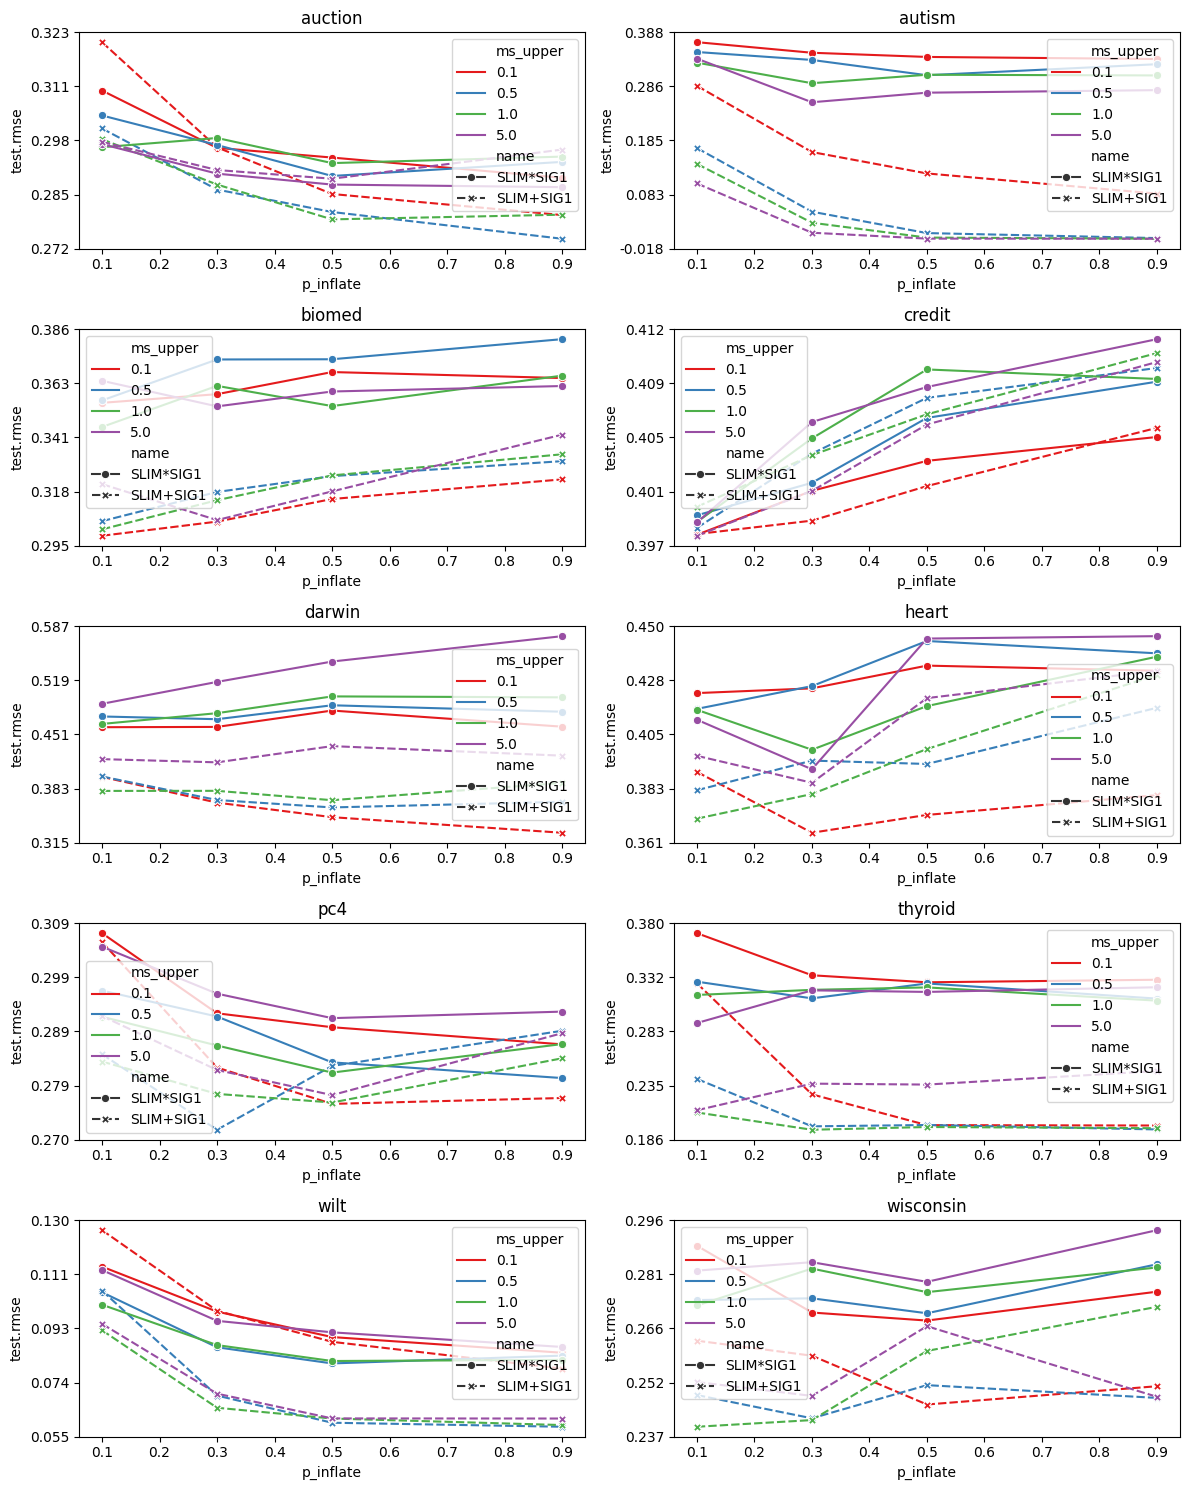

In [31]:
plot_by_p_inflate_with_ms(reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['test.rmse'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()), 'test.rmse', colors_dict)

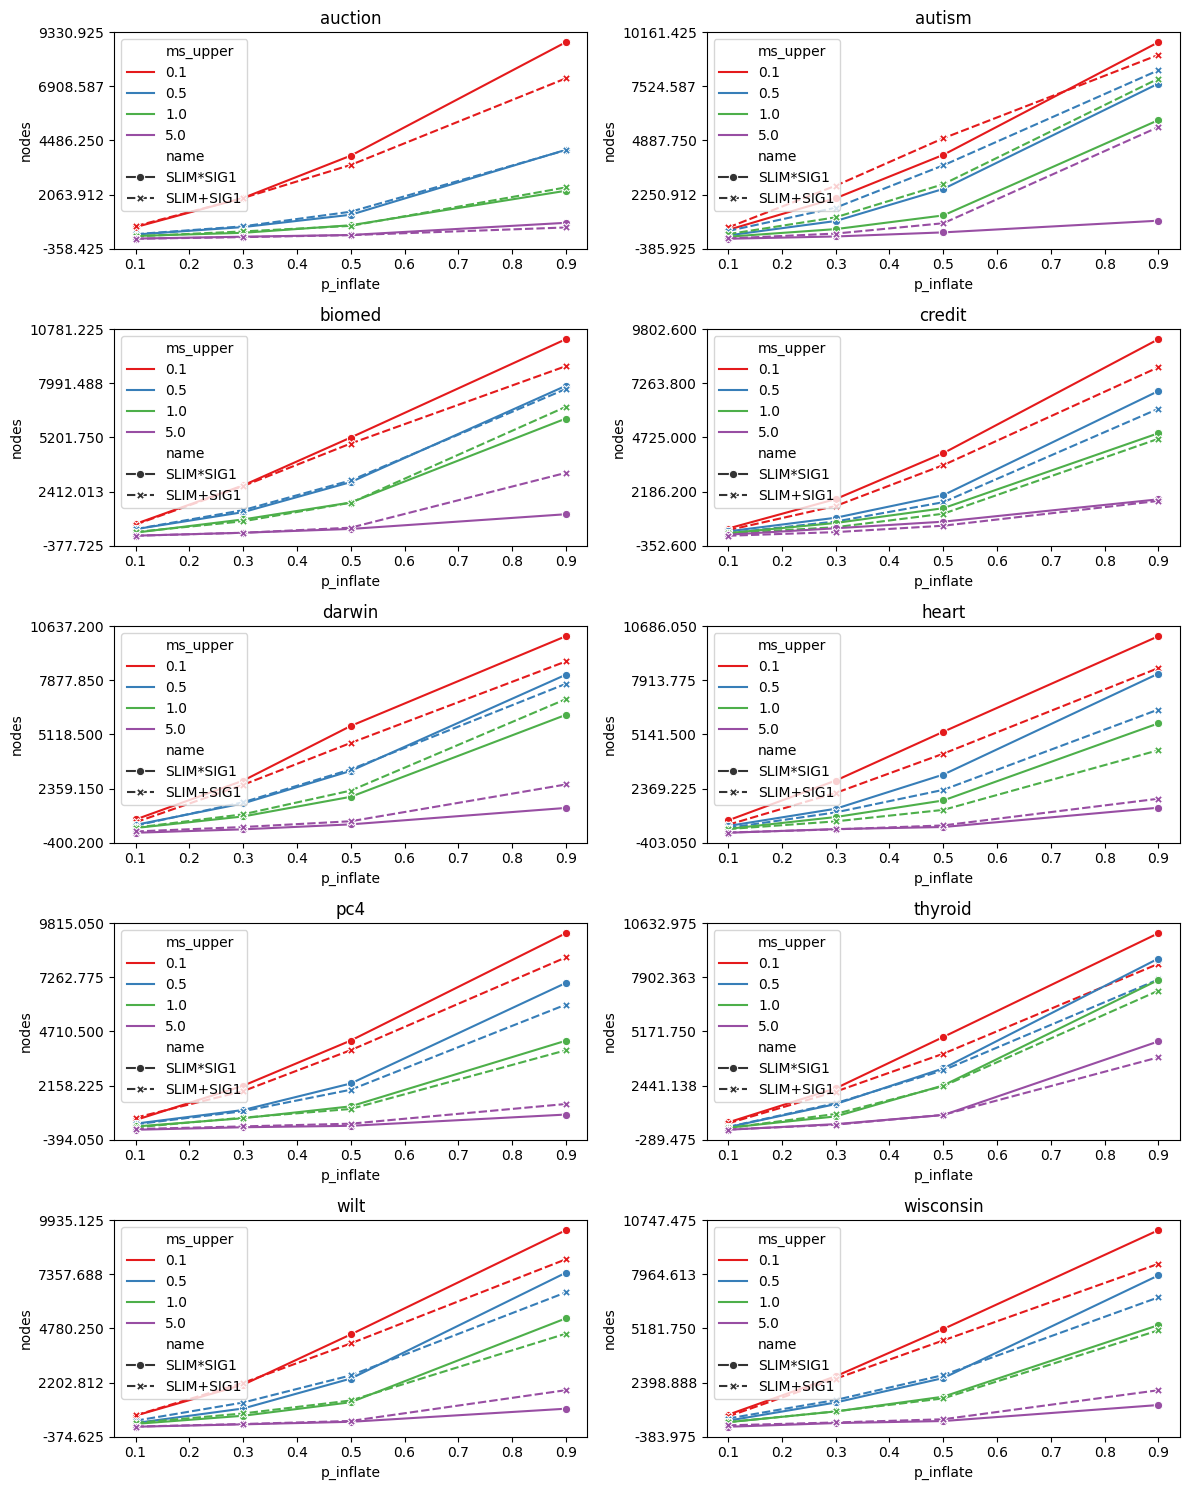

In [32]:
plot_by_p_inflate_with_ms(reshape_df(ana.results.groupby(['dataset_name', 'config_settings', 'run_id'])['nodes_count'].median().unstack().median(axis=1).sort_values(ascending=False).unstack()), 'nodes', colors_dict)

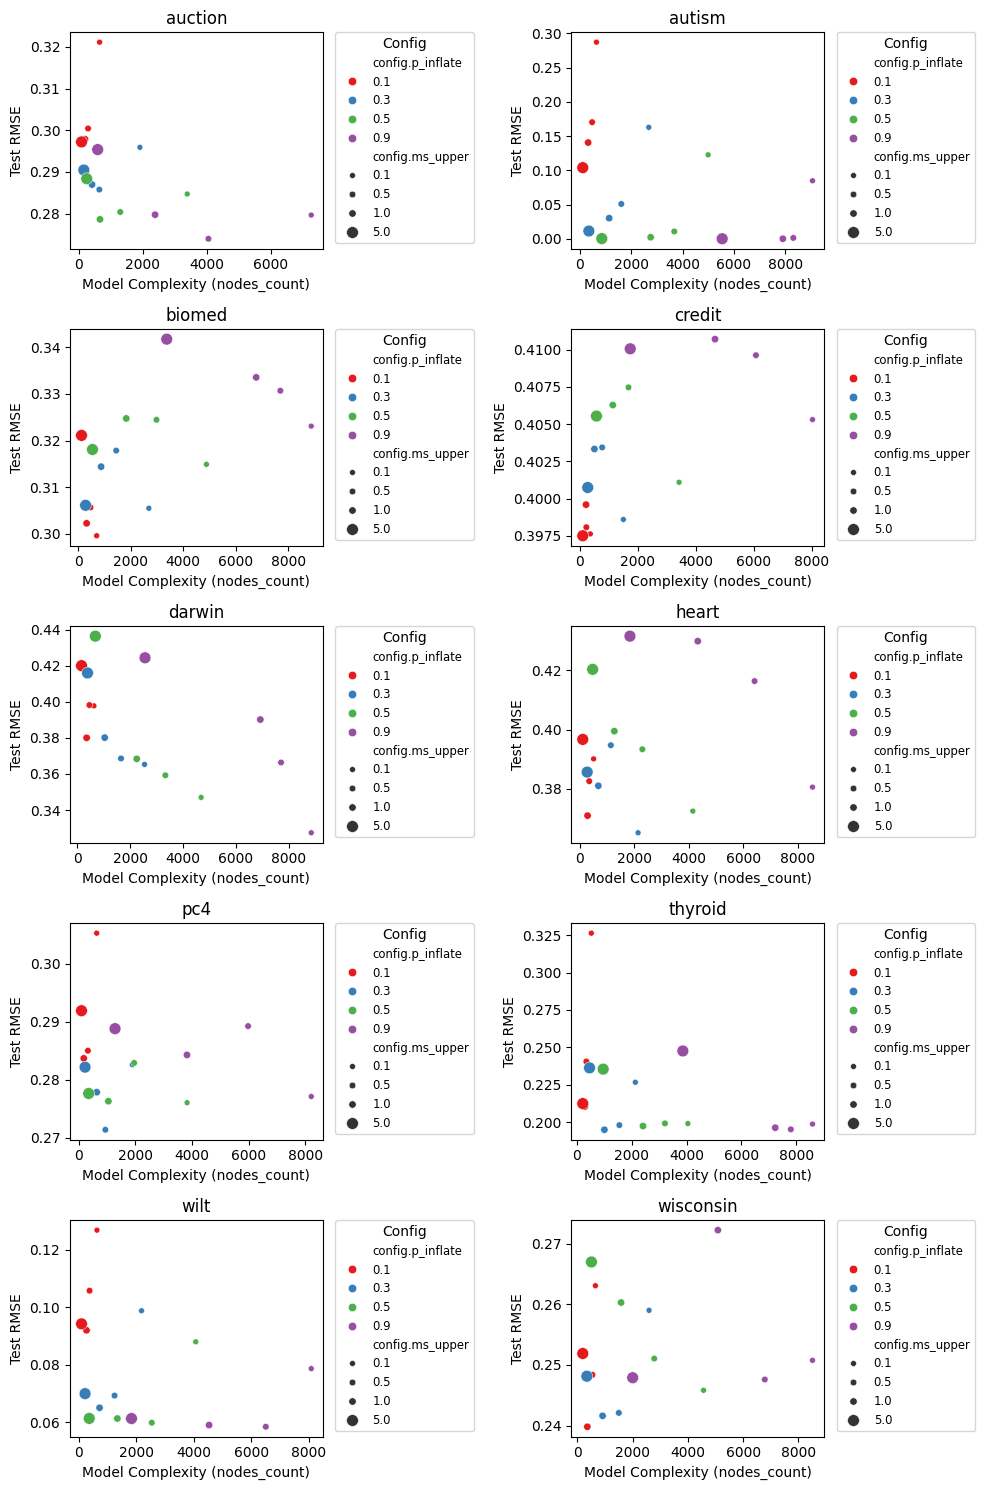

In [ ]:
df = ana.results.groupby(['dataset_name', 'config_settings', 'name', 'config.p_inflate', 'config.ms_upper'])[['nodes_count', 'test.rmse']].median().reset_index(drop=False)
import math

# Get unique datasets
datasets = df['dataset_name'].unique()
n = len(datasets)

# Create subplots (2 per row)
fig, axes = plt.subplots(math.ceil(n/2), 2, figsize=(10, 3 * math.ceil(n/2)))
axes = axes.flatten()
for i, dataset in enumerate(datasets):
    subset = df[df['dataset_name'] == dataset]
    subset = subset[subset['name'] == 'SLIM+SIG1']
    ax = axes[i]
    sns.scatterplot(
        data=subset,
        x='nodes_count',
        y='test.rmse',
        hue='config.p_inflate',
        #size= 'config.p_inflate',
        size= 'config.ms_upper',
        palette = 'Set1',
        ax=ax
    )
    #ax.axvline(x=1000, color='black', linestyle='--')
    ax.set_title(f"{dataset}")
    ax.set_xlabel("Model Complexity (nodes_count)")
    ax.set_ylabel("Test RMSE")
    ax.legend(loc='best', fontsize='small', title='Config', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

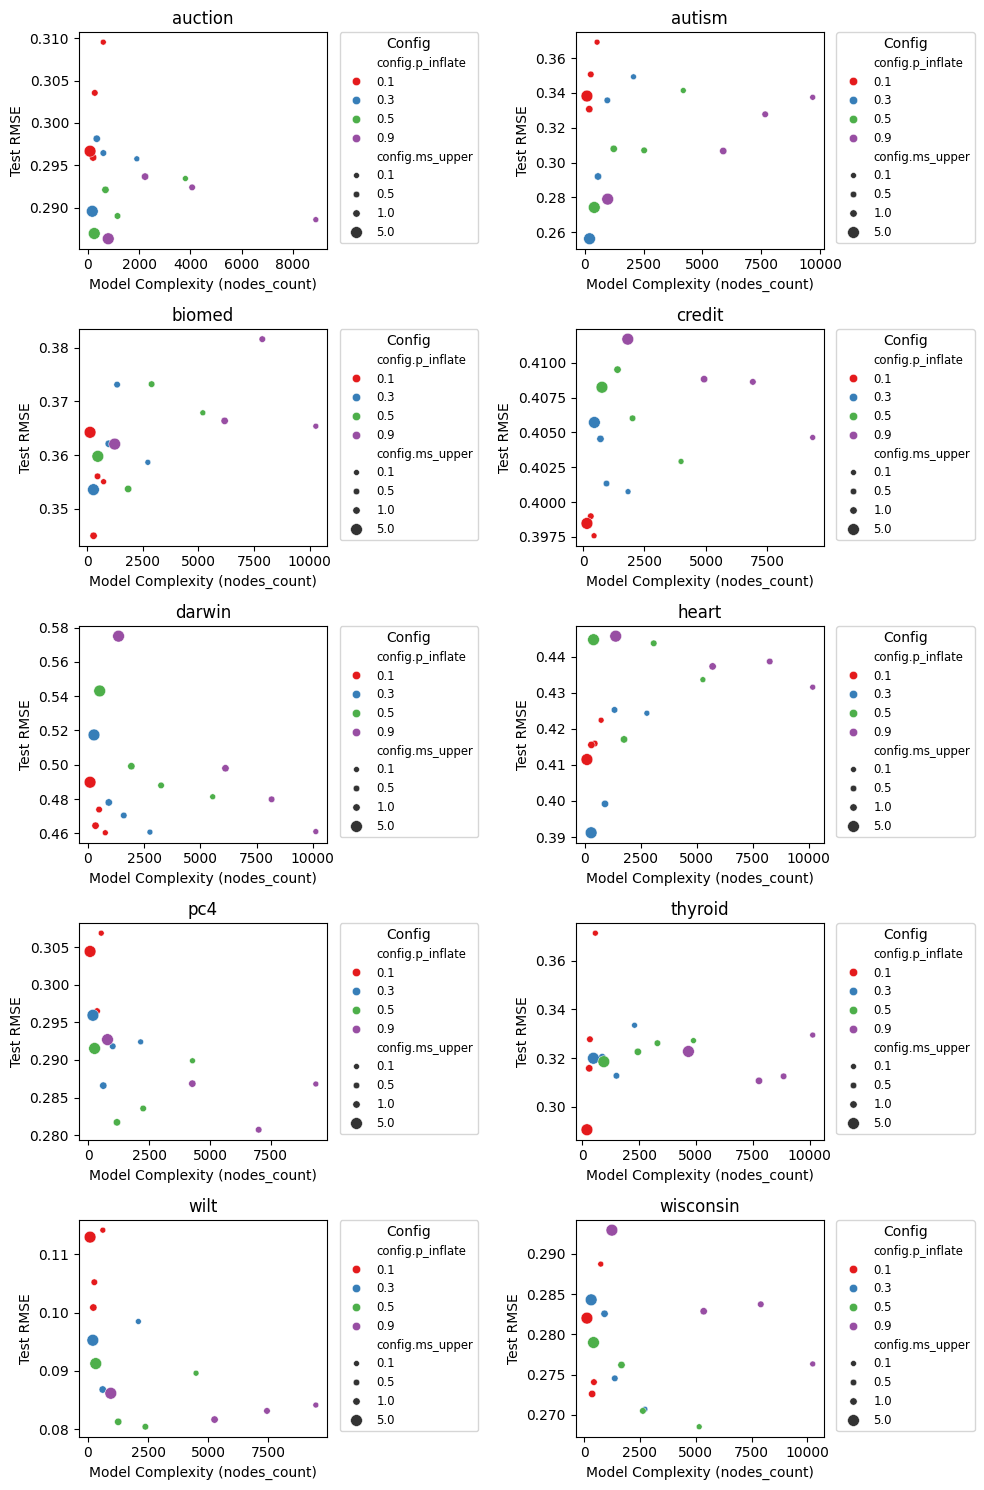

In [34]:
df = ana.results.groupby(['dataset_name', 'config_settings', 'name', 'config.p_inflate', 'config.ms_upper'])[['nodes_count', 'test.rmse']].median().reset_index(drop=False)
import math

# Get unique datasets
datasets = df['dataset_name'].unique()
n = len(datasets)

# Create subplots (2 per row)
fig, axes = plt.subplots(math.ceil(n/2), 2, figsize=(10, 3 * math.ceil(n/2)))
axes = axes.flatten()
for i, dataset in enumerate(datasets):
    subset = df[df['dataset_name'] == dataset]
    subset = subset[subset['name'] == 'SLIM*SIG1']
    ax = axes[i]
    sns.scatterplot(
        data=subset,
        x='nodes_count',
        y='test.rmse',
        hue='config.p_inflate',
        #size= 'config.p_inflate',
        size= 'config.ms_upper',
        palette = 'Set1',
        ax=ax
    )
    #ax.axvline(x=1000, color='black', linestyle='--')
    ax.set_title(f"{dataset}")
    ax.set_xlabel("Model Complexity (nodes_count)")
    ax.set_ylabel("Test RMSE")
    ax.legend(loc='best', fontsize='small', title='Config', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



In [38]:
import numpy as np
import pandas as pd

def pareto_optimal(df, cols_to_minimize):
    data = df[cols_to_minimize].values
    is_pareto = np.ones(data.shape[0], dtype=bool)
    
    for i, point in enumerate(data):
        if is_pareto[i]:
            # Remove points that are dominated by point[i]
            is_pareto[is_pareto] = np.any(data[is_pareto] < point, axis=1) | np.all(data[is_pareto] == point, axis=1)
            is_pareto[i] = True  # Keep current point
    
    return df[is_pareto].reset_index(drop=True)

# Example usage:
pareto_df = pareto_optimal(df[(df['dataset_name']=='darwin') & (df['name']=='SLIM+SIG1')], ['test.rmse', 'nodes_count'])
print(pareto_df)


  dataset_name              config_settings       name  config.p_inflate  \
0       darwin  SLIM+SIG1_inflate0.1_ms1.0_  SLIM+SIG1               0.1   
1       darwin  SLIM+SIG1_inflate0.1_ms5.0_  SLIM+SIG1               0.1   
2       darwin  SLIM+SIG1_inflate0.3_ms0.1_  SLIM+SIG1               0.3   
3       darwin  SLIM+SIG1_inflate0.3_ms0.5_  SLIM+SIG1               0.3   
4       darwin  SLIM+SIG1_inflate0.5_ms0.1_  SLIM+SIG1               0.5   
5       darwin  SLIM+SIG1_inflate0.5_ms0.5_  SLIM+SIG1               0.5   
6       darwin  SLIM+SIG1_inflate0.5_ms1.0_  SLIM+SIG1               0.5   
7       darwin  SLIM+SIG1_inflate0.9_ms0.1_  SLIM+SIG1               0.9   

   config.ms_upper  nodes_count  test.rmse  
0              1.0        360.5   0.380084  
1              5.0        168.0   0.420128  
2              0.1       2549.0   0.365314  
3              0.5       1659.5   0.368626  
4              0.1       4685.5   0.347013  
5              0.5       3334.5   0.359277  


In [42]:
ana.results[['config_settings', 'config_id']].drop_duplicates().reset_index(drop=True)

,config_settings,config_id
0,SLIM*SIG1_inflate0.1_ms0.1_,17
1,SLIM*SIG1_inflate0.1_ms0.5_,18
2,SLIM*SIG1_inflate0.1_ms1.0_,19
3,SLIM*SIG1_inflate0.1_ms5.0_,20
4,SLIM*SIG1_inflate0.3_ms0.1_,21
5,SLIM*SIG1_inflate0.3_ms0.5_,22
6,SLIM*SIG1_inflate0.3_ms1.0_,23
7,SLIM*SIG1_inflate0.3_ms5.0_,24
8,SLIM*SIG1_inflate0.5_ms0.1_,25
9,SLIM*SIG1_inflate0.5_ms0.5_,26


In [ ]:
best_configs = pd.DataFrame(columns= ['dataset_name', 'config_id'])
best_configs.loc[0] = ['auction', 43]
best_configs.loc[1] = ['auction', 28]
best_configs.loc[2] = ['autism', 38]
best_configs.loc[3] = ['autism', 24]
best_configs.loc[4] = ['biomed', 35]
best_configs.loc[5] = ['biomed', 19]
best_configs.loc[6] = ['credit', 36]
best_configs.loc[7] = ['credit', 20]
best_configs.loc[8] = ['darwin', 35]
best_configs.loc[9] = ['darwin', 19]
best_configs.loc[10] = ['heart', 35]
best_configs.loc[11] = ['heart', 24]
best_configs.loc[12] = ['pc4', 42]
best_configs.loc[13] = ['pc4', 23]
best_configs.loc[14] = ['thyroid', 39]
best_configs.loc[15] = ['thyroid', 20]
best_configs.loc[16] = ['wilt', 44]
best_configs.loc[17] = ['wilt', 32]
best_configs.loc[18] = ['wisconsin', 35]
best_configs.loc[19] = ['wisconsin', 19]
best_configs.to_csv('best_configs.csv', index=False)

In [23]:
a = ana.results[['config_id', 'config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']].drop_duplicates().reset_index(drop=True)
ana.logs['config_id'] = ana.logs['config_id'].astype(int)
df = pd.merge(
    ana.logs[['config_id', 'elite_nodes', 'generation']],
    a,
    on='config_id',
    how='right'
)

df['gen*p_inflate'] = df['config.p_inflate']  * df['generation']
df.drop(columns=['config_id'], inplace=True)
df = pd.get_dummies(df, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)

from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
X = df.drop(columns=['elite_nodes', 'config.p_inflate', 'generation'])
#X['x2'] = X['gen*p_inflate'] * X['gen*p_inflate']
y = df['elite_nodes']


lr = LinearRegression()
lr.fit(X, y)
print(r2_score(y, lr.predict(X)))
lr.coef_, lr.intercept_

0.7502440022258189


(array([-2.77145702e+02,  4.73091880e+00, -2.36743465e-11, -2.36945325e-11,
        -2.38223738e-11, -2.39854872e-11, -2.38310508e-11, -2.39286930e-11,
        -2.39724354e-11, -2.40388357e-11, -2.40994258e-11, -5.64624336e+01,
         2.43825756e-03]),
 495.20090837740497)

In [12]:
X = ana.results[['config.p_inflate', 'config.ms_upper', 'dataset_name', 'name']]
X = pd.get_dummies(X, columns=['dataset_name', 'name'], prefix='dataset', drop_first=True)
y = ana.results['nodes_count']
lr = LinearRegression()
lr.fit(X, y)
r2_score(y, lr.predict(X))

0.7589622832091918

In [13]:
lr.coef_, lr.intercept_

(array([7003.59709821, -542.20042595, 1159.3984375 , 1160.33984375,
         544.44140625, 1201.1328125 ,  882.46484375,  492.234375  ,
        1373.3828125 ,  544.5703125 ,  953.671875  ,  -94.35703125]),
 -646.1063507514054)

Median Test Errors (RMSE) Table

In [14]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,603.0,271.5,206.5,87.5,1910.5,605.0,348.5,174.0,3805.0,1157.5,...,410.5,154.5,3389.5,1293.5,660.0,244.5,7269.0,4052.5,2383.0,587.5
autism,524.0,257.0,193.5,93.5,2071.0,959.0,563.5,205.0,4185.5,2523.0,...,1139.0,346.5,4994.0,3674.0,2755.0,850.0,9061.5,8313.5,7905.0,5542.0
biomed,740.5,468.5,290.0,133.0,2729.0,1348.0,971.0,284.5,5198.5,2898.0,...,876.0,284.0,4889.5,2984.5,1833.5,546.5,8882.0,7705.0,6784.5,3376.0
credit,448.0,315.0,232.0,159.0,1831.0,954.5,709.0,461.0,3986.5,2014.0,...,511.0,280.0,3426.0,1684.0,1143.0,580.0,8023.0,6074.5,4664.5,1744.5
darwin,778.5,503.5,344.0,101.5,2762.0,1599.5,933.5,276.0,5552.0,3258.0,...,1043.5,394.5,4685.5,3334.5,2253.5,689.0,8845.5,7704.5,6923.0,2566.5
heart,734.5,447.5,299.5,101.0,2777.5,1332.5,906.5,288.5,5279.0,3083.5,...,685.0,275.5,4155.5,2300.5,1273.5,476.5,8547.5,6421.0,4335.5,1846.0
pc4,529.0,358.0,224.0,70.0,2148.5,1002.0,613.5,188.0,4281.0,2254.0,...,640.5,228.5,3828.0,1959.0,1051.5,356.5,8207.5,5979.0,3823.0,1286.0
thyroid,576.5,338.0,308.0,207.0,2300.5,1503.5,881.0,491.0,4892.5,3307.0,...,1006.0,464.0,4047.5,3212.0,2412.0,961.0,8589.0,7798.5,7231.5,3864.5
wilt,624.0,270.5,230.0,94.0,2099.0,965.0,618.0,208.5,4494.0,2389.5,...,728.0,225.0,4067.5,2543.0,1346.0,370.0,8078.0,6500.0,4531.5,1838.0


P-Values for the ANOVA Test comparing the performance of different Inflation Rates for each SLIM-Version

In [15]:
get_anova_table(ana.results, 'test.rmse')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,1.654353e-06,9.620716e-14
autism,6.438163e-02,8.217795e-21
biomed,6.166785e-01,1.355175e-02
credit,7.575274e-10,1.339624e-11
darwin,2.757825e-01,1.874553e-01
heart,1.136183e-01,7.495074e-03
pc4,8.520194e-07,1.773320e-06
thyroid,9.570435e-01,2.847408e-02
wilt,9.281917e-24,6.365201e-10


P-Values when excluding the Corner Values [0.1, 0.9] from the ANOVA Test

In [16]:
get_anova_table(ana.results.loc[ana.results['config.p_inflate'].isin([0.3, 0.5, 0.7])], 'test.rmse')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.152928,0.020016
autism,0.963121,0.036445
biomed,0.762331,0.080463
credit,0.099128,0.004521
darwin,0.214460,0.874874
heart,0.136356,0.331330
pc4,0.084529,0.669237
thyroid,0.562981,0.942565
wilt,0.020377,0.107363


Countplot for the Sum of best achieved Performance for the different Inflation Rates accross Datasets

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

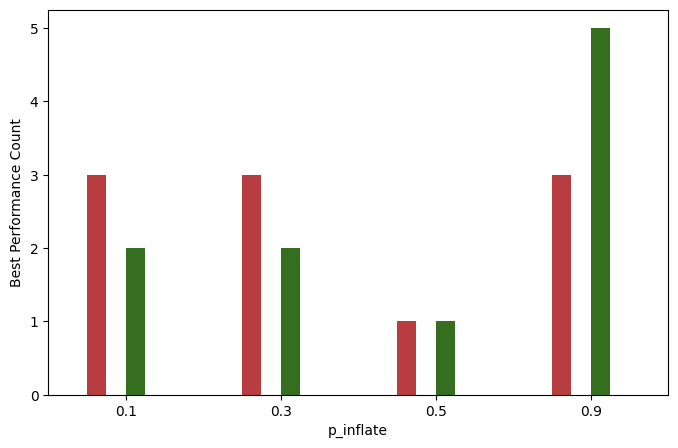

In [17]:
plot_countplot(ana.results, 'test.rmse')

Visualization for the Median Tree Size of the Final Individual for different Inflation Rates

<span style="color:#cd282c;">&#9632;  SLIM&#42;SIG1</span>
<span style="color:#34429a;">&#9632; SLIM&#42;SIG2</span>
<span style="color:#307b12;">&#9632;  SLIM+SIG1</span>
<span style="color:#e99928;">&#9632;  SLIM+SIG2</span>

             SLIM*SIG1                                                     \
dataset_name   auction  autism   biomed  credit   darwin    heart     pc4   
0.1              603.0   524.0    740.5   448.0    778.5    734.5   529.0   
0.1              271.5   257.0    468.5   315.0    503.5    447.5   358.0   
0.1              206.5   193.5    290.0   232.0    344.0    299.5   224.0   
0.1               87.5    93.5    133.0   159.0    101.5    101.0    70.0   
0.3             1910.5  2071.0   2729.0  1831.0   2762.0   2777.5  2148.5   
0.3              605.0   959.0   1348.0   954.5   1599.5   1332.5  1002.0   
0.3              348.5   563.5    971.0   709.0    933.5    906.5   613.5   
0.3              174.0   205.0    284.5   461.0    276.0    288.5   188.0   
0.5             3805.0  4185.5   5198.5  3986.5   5552.0   5279.0  4281.0   
0.5             1157.5  2523.0   2898.0  2014.0   3258.0   3083.5  2254.0   
0.5              687.5  1231.5   1844.5  1402.5   1936.5   1757.0  1175.5   

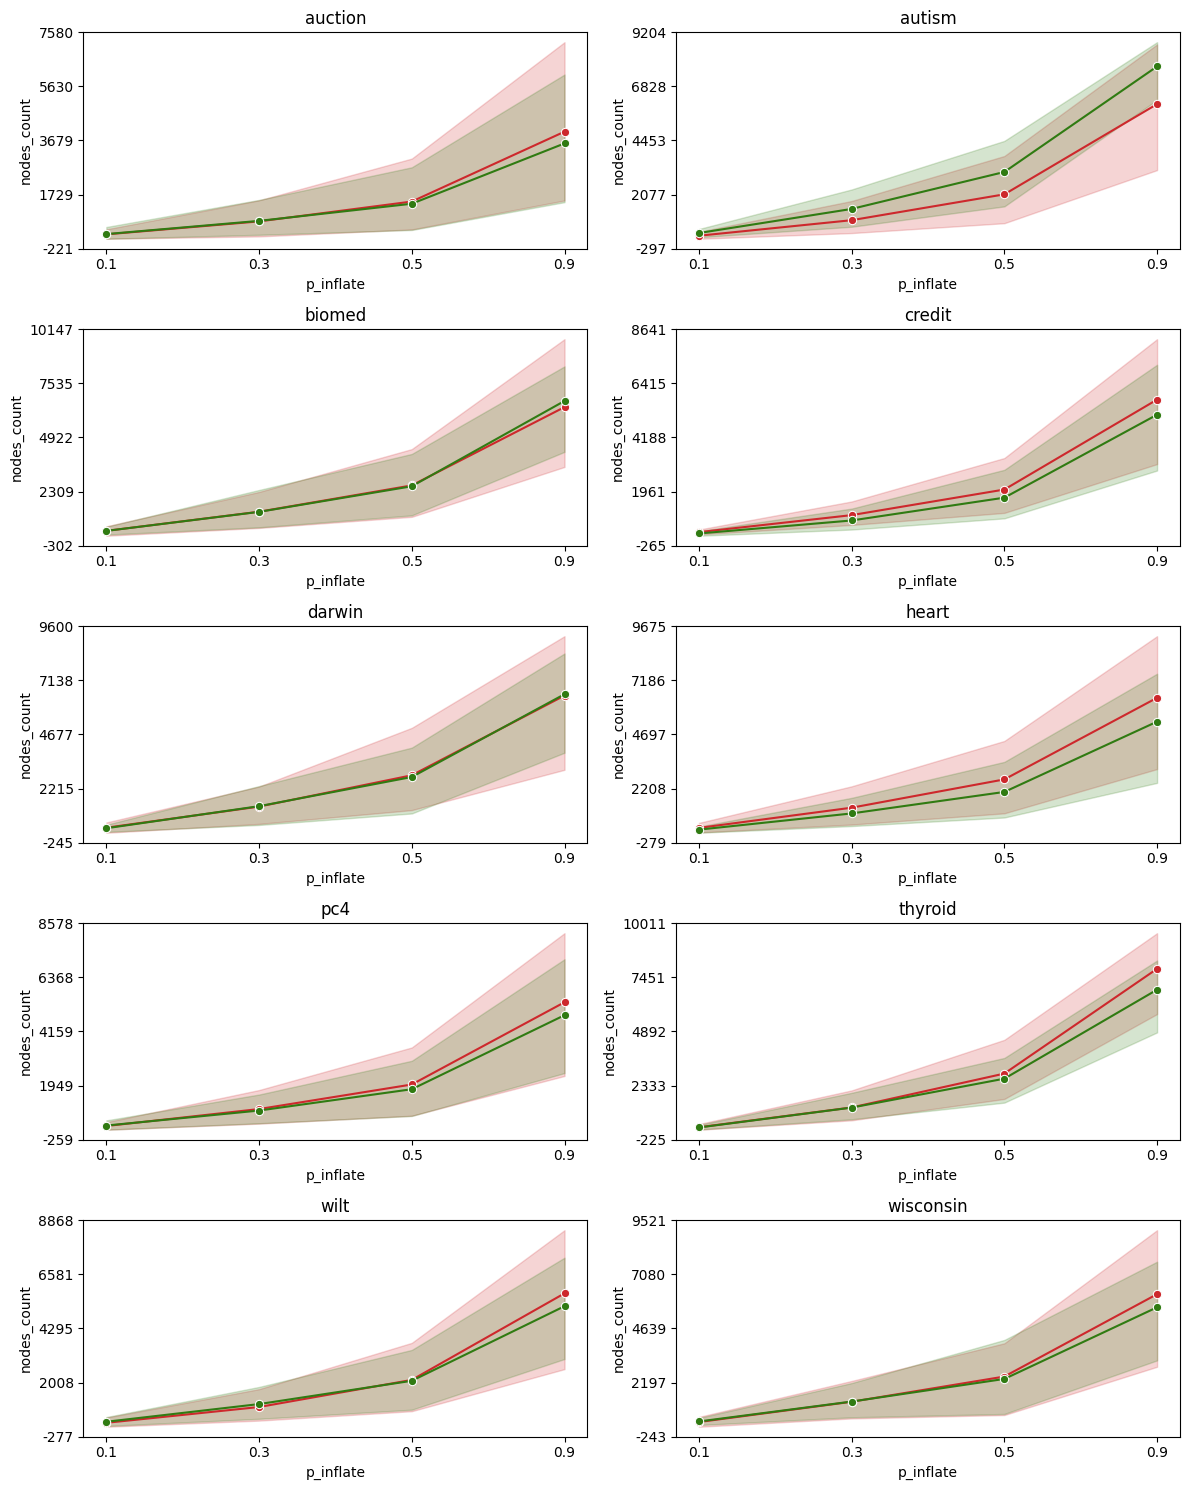

In [18]:
plot_by_p_inflate(ana.results, 'nodes_count') #[ana.results['config.ms_upper']==5]

Median Tree Size Table

In [19]:
get_aggregated_performance(ana.results, metric='nodes_count', agg='median')

config_settings,SLIM*SIG1_inflate0.1_ms0.1_,SLIM*SIG1_inflate0.1_ms0.5_,SLIM*SIG1_inflate0.1_ms1.0_,SLIM*SIG1_inflate0.1_ms5.0_,SLIM*SIG1_inflate0.3_ms0.1_,SLIM*SIG1_inflate0.3_ms0.5_,SLIM*SIG1_inflate0.3_ms1.0_,SLIM*SIG1_inflate0.3_ms5.0_,SLIM*SIG1_inflate0.5_ms0.1_,SLIM*SIG1_inflate0.5_ms0.5_,...,SLIM+SIG1_inflate0.3_ms1.0_,SLIM+SIG1_inflate0.3_ms5.0_,SLIM+SIG1_inflate0.5_ms0.1_,SLIM+SIG1_inflate0.5_ms0.5_,SLIM+SIG1_inflate0.5_ms1.0_,SLIM+SIG1_inflate0.5_ms5.0_,SLIM+SIG1_inflate0.9_ms0.1_,SLIM+SIG1_inflate0.9_ms0.5_,SLIM+SIG1_inflate0.9_ms1.0_,SLIM+SIG1_inflate0.9_ms5.0_
dataset_name,,,,,,,,,,,,,,,,,,,,,
auction,603.0,271.5,206.5,87.5,1910.5,605.0,348.5,174.0,3805.0,1157.5,...,410.5,154.5,3389.5,1293.5,660.0,244.5,7269.0,4052.5,2383.0,587.5
autism,524.0,257.0,193.5,93.5,2071.0,959.0,563.5,205.0,4185.5,2523.0,...,1139.0,346.5,4994.0,3674.0,2755.0,850.0,9061.5,8313.5,7905.0,5542.0
biomed,740.5,468.5,290.0,133.0,2729.0,1348.0,971.0,284.5,5198.5,2898.0,...,876.0,284.0,4889.5,2984.5,1833.5,546.5,8882.0,7705.0,6784.5,3376.0
credit,448.0,315.0,232.0,159.0,1831.0,954.5,709.0,461.0,3986.5,2014.0,...,511.0,280.0,3426.0,1684.0,1143.0,580.0,8023.0,6074.5,4664.5,1744.5
darwin,778.5,503.5,344.0,101.5,2762.0,1599.5,933.5,276.0,5552.0,3258.0,...,1043.5,394.5,4685.5,3334.5,2253.5,689.0,8845.5,7704.5,6923.0,2566.5
heart,734.5,447.5,299.5,101.0,2777.5,1332.5,906.5,288.5,5279.0,3083.5,...,685.0,275.5,4155.5,2300.5,1273.5,476.5,8547.5,6421.0,4335.5,1846.0
pc4,529.0,358.0,224.0,70.0,2148.5,1002.0,613.5,188.0,4281.0,2254.0,...,640.5,228.5,3828.0,1959.0,1051.5,356.5,8207.5,5979.0,3823.0,1286.0
thyroid,576.5,338.0,308.0,207.0,2300.5,1503.5,881.0,491.0,4892.5,3307.0,...,1006.0,464.0,4047.5,3212.0,2412.0,961.0,8589.0,7798.5,7231.5,3864.5
wilt,624.0,270.5,230.0,94.0,2099.0,965.0,618.0,208.5,4494.0,2389.5,...,728.0,225.0,4067.5,2543.0,1346.0,370.0,8078.0,6500.0,4531.5,1838.0


P-Values for the ANOVA Test comparing the Tree Size of different Inflation Rates for each SLIM-Version

In [20]:
get_anova_table(ana.results, 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,4.230605e-14,1.564423e-15
autism,1.500703e-22,7.274492e-53
biomed,2.453013e-23,7.667909e-37
credit,1.021858e-28,6.246255e-31
darwin,2.697233e-23,8.753166e-34
heart,7.669009e-23,8.485236e-28
pc4,1.431454e-20,2.473243e-23
thyroid,4.478236e-44,2.313032e-48
wilt,3.001208e-23,1.494930e-19


P-Values when excluding the Corner Value 0.1 from the ANOVA Test

In [21]:
get_anova_table(ana.results.loc[ana.results['config.p_inflate'].isin([0.3, 0.5, 0.7])], 'nodes_count')

name,SLIM*SIG1,SLIM+SIG1
dataset,,
auction,0.014737,1.638573e-02
autism,0.000321,4.577240e-06
biomed,0.000567,3.691382e-04
credit,0.000054,3.064843e-05
darwin,0.000322,4.811165e-05
heart,0.000579,5.832726e-04
pc4,0.000914,9.836134e-04
thyroid,0.000001,1.531539e-07
wilt,0.000768,5.255260e-03
